# Weighted Pull up & Front Lever Survey

## Exploratory Data Analysis

### How to read

In [ ]:
the code

In [ ]:
the result of the code

the memo/description of what I did

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statistics import mean

In [2]:
raw = pd.read_csv("Weighted PU and FL cleaned.csv",encoding = "ISO-8859-1")

In [3]:
copy = raw.copy()

In [4]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Timestamp                                          609 non-null    object 
 1   Weighted Pullup 1RM (% of BW)                      609 non-null    object 
 2   Max Front Lever progression (3 seconds good form)  609 non-null    object 
 3   Other thoughts or comments? Helpful data           219 non-null    object 
 4   Bodyweight (kg)                                    590 non-null    float64
 5   Max pullups (endurance)                            586 non-null    float64
 6   Height (cm)                                        498 non-null    float64
dtypes: float64(3), object(4)
memory usage: 33.4+ KB


In [5]:
copy.describe()

,Bodyweight (kg),Max pullups (endurance),Height (cm)
count,590.000000,586.000000,498.000000
mean,72.343051,19.220990,177.227269
std,12.633892,7.092446,7.433451
min,45.000000,3.000000,142.000000
25%,65.250000,15.000000,172.000000
50%,71.000000,19.000000,177.900000
75%,78.000000,24.000000,182.000000
max,220.000000,42.500000,207.000000


In [6]:
copy.columns

Index(['Timestamp', 'Weighted Pullup 1RM (% of BW)',
       'Max Front Lever progression (3 seconds good form)',
       'Other thoughts or comments? Helpful data', 'Bodyweight (kg)',
       'Max pullups (endurance)', 'Height (cm)'],
      dtype='object')

In [7]:
copy.index

RangeIndex(start=0, stop=609, step=1)

In [8]:
copy.apply(lambda x: sum(x.isnull()),axis=0)

Timestamp                                              0
Weighted Pullup 1RM (% of BW)                          0
Max Front Lever progression (3 seconds good form)      0
Other thoughts or comments? Helpful data             390
Bodyweight (kg)                                       19
Max pullups (endurance)                               23
Height (cm)                                          111
dtype: int64

Counting how many data is missing

<AxesSubplot:>

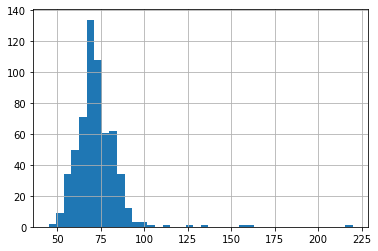

In [60]:
copy["Bodyweight (kg)"].hist(bins = 40)

<AxesSubplot:>

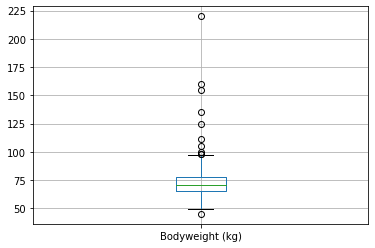

In [10]:
copy.boxplot(column="Bodyweight (kg)")

Weight around the 70s seem to be the most common with some strange outliers in the 100+ and even 225 range. I thought that these people may have input the weight in pounds instead of kg but I'm not so sure.
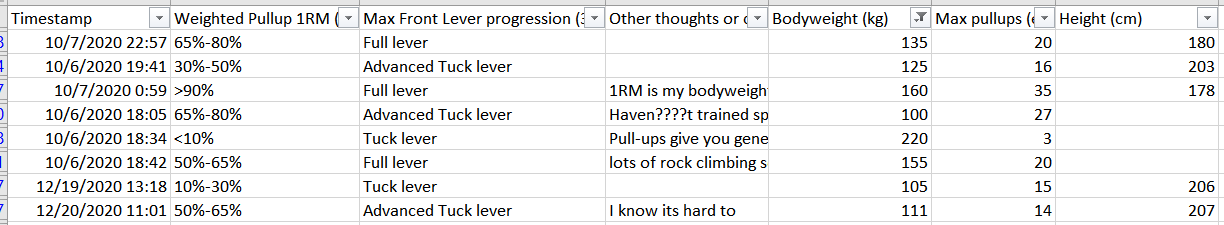

<AxesSubplot:>

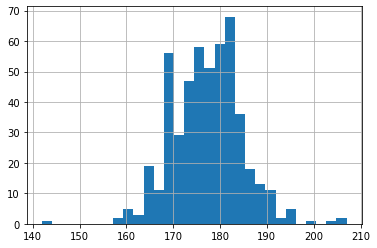

In [62]:
copy["Height (cm)"].hist(bins = 30)

We seem to have very tall survey participants on average

<AxesSubplot:>

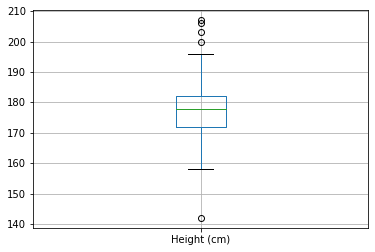

In [12]:
copy.boxplot(column="Height (cm)")

In [13]:
fl_counts = copy['Max Front Lever progression (3 seconds good form)'].value_counts().to_frame()
fl_counts_row_indices = [5,4,0,3,2,1]
fl_counts = fl_counts.iloc[fl_counts_row_indices]
fl_counts

,Max Front Lever progression (3 seconds good form)
No tuck lever,13
Tuck lever,68
Advanced Tuck lever,191
Straddle Halflay lever,83
Straddle lever,84
Full lever,170


I expected a more bell curve shape but there seems to be a big proportion of people in the sample that can do a full FL. Maybe the respondents were being dishonest?

<AxesSubplot:>

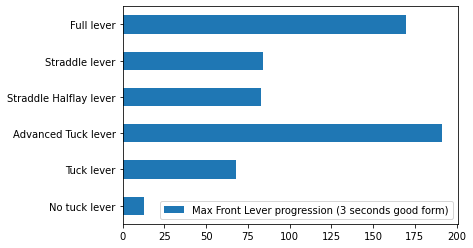

In [50]:
fl_counts.plot(kind = 'barh')

In [41]:
groupby_fl = copy.groupby('Max Front Lever progression (3 seconds good form)').mean()
groupby_fl = groupby_fl.iloc[[2,5,0,3,4,1]]
groupby_fl

,Bodyweight (kg),Max pullups (endurance),Height (cm)
Max Front Lever progression (3 seconds good form),,,
No tuck lever,74.000000,10.750000,178.200000
Tuck lever,75.704545,12.712121,178.309091
Advanced Tuck lever,73.565556,16.773481,179.501242
Straddle Halflay lever,71.132715,19.018750,177.494366
Straddle lever,70.942771,20.701220,174.053448
Full lever,70.869643,24.487879,175.337622


Kinda obvious but average bodyweight and height goes down the more difficult FL variation athlete can do. Max pull ups on the other hand increases.

In [42]:
fl_pivot = copy.pivot_table(index=['Max Front Lever progression (3 seconds good form)'],
                 columns='Weighted Pullup 1RM (% of BW)',
                 aggfunc='size',
                 fill_value=0)
fl_pivot = fl_pivot[["<10%","10%-30%","30%-50%","50%-65%","65%-80%","80%-90%",">90%"]].copy()
fl_pivot = fl_pivot.iloc[[2,5,0,3,4,1]]
fl_pivot

Weighted Pullup 1RM (% of BW),<10%,10%-30%,30%-50%,50%-65%,65%-80%,80%-90%,>90%
Max Front Lever progression (3 seconds good form),,,,,,,
No tuck lever,4,3,2,2,1,0,1
Tuck lever,10,30,19,6,2,1,0
Advanced Tuck lever,10,37,68,43,23,6,4
Straddle Halflay lever,2,10,22,25,21,2,1
Straddle lever,3,3,27,28,16,6,1
Full lever,1,5,13,30,57,33,31


Quite apparent that the people strong in FL are also strong at weighted pull ups. Whether weighted pull ups allow you to achieve FL is a matter still not clear yet.

In [68]:
wpu_counts = copy['Weighted Pullup 1RM (% of BW)'].value_counts().to_frame()
wpu_counts_row_indices = [6,3,0,1,4,5]
wpu_counts = wpu_counts.iloc[wpu_counts_row_indices]
wpu_counts

,Weighted Pullup 1RM (% of BW)
<10%,30
10%-30%,88
30%-50%,151
50%-65%,134
80%-90%,48
>90%,38


The distribution of weighted pull up seems normal. But compared to the distribution of front lever, it is not as skewed as I thought it would be.
FL distribution from above for comparison
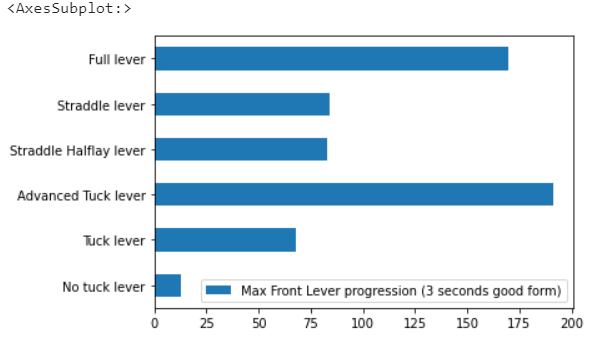

<AxesSubplot:>

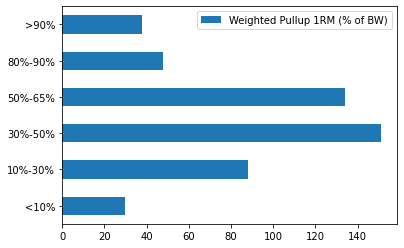

In [69]:
wpu_counts.plot(kind = 'barh')

In [70]:
groupby_wpu = copy.groupby('Weighted Pullup 1RM (% of BW)').mean()
groupby_wpu = groupby_wpu.iloc[[5,0,1,2,3,4,6]]
groupby_wpu

,Bodyweight (kg),Max pullups (endurance),Height (cm)
Weighted Pullup 1RM (% of BW),,,
<10%,73.517241,11.396552,175.350000
10%-30%,71.676829,12.176829,178.352941
30%-50%,71.303793,17.054422,177.834959
50%-65%,74.044275,19.592308,177.805310
65%-80%,73.231249,23.004274,176.959800
80%-90%,70.182222,26.088889,174.369730
>90%,70.739474,28.194444,176.043030


In [43]:
wpu_pivot = copy.pivot_table(index=['Weighted Pullup 1RM (% of BW)'],
                 columns='Max Front Lever progression (3 seconds good form)',
                 aggfunc='size',
                 fill_value=0)
wpu_pivot = wpu_pivot[["No tuck lever","Tuck lever","Advanced Tuck lever","Straddle Halflay lever","Straddle lever","Full lever"]].copy()
wpu_pivot = wpu_pivot.iloc[[5,0,1,2,3,4,6]]
wpu_pivot

Max Front Lever progression (3 seconds good form),No tuck lever,Tuck lever,Advanced Tuck lever,Straddle Halflay lever,Straddle lever,Full lever
Weighted Pullup 1RM (% of BW),,,,,,
<10%,4,10,10,2,3,1
10%-30%,3,30,37,10,3,5
30%-50%,2,19,68,22,27,13
50%-65%,2,6,43,25,28,30
65%-80%,1,2,23,21,16,57
80%-90%,0,1,6,2,6,33
>90%,1,0,4,1,1,31
